In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import bbi

## Set plotting parameters

In [2]:
mpl.rcParams.update({'pdf.fonttype': 42,
                     'ps.fonttype': 42,
                     'xtick.labelsize': 22,
                     'ytick.labelsize': 22,
                     'axes.labelsize':22,
                     'font.size': 22})

## Define functions

In [3]:
# a function to calculate stacks for plotting 

def calculate_stacks(regions, chip_path, nbins, window):
    df = regions.copy()
    chroms = df.chrom
    starts = df.mid - window
    ends = df.mid + window
    stack = bbi.stackup(chip_path, chroms, starts, ends, bins=nbins) 
    stack[np.isnan(stack)] = 0
    return stack

## Upload ChIP-seq data

In [4]:
# Path to ChIP-seq files
chipMap = {"SMC3": "/groups/gerlich/experiments/Experiments_004900/004983/data/chip_seq_input_norm/SMC3_merged_input_norm_log2.bw",
          "Sororin": "/groups/gerlich/experiments/Experiments_004900/004983/data/chip_seq_input_norm/Sororin_merged_input_norm_log2.bw"}

## Upload CTCF peaks

In [5]:
name = "smc3_w_sororin"
smc3_w_sororin = pd.read_csv("/groups/gerlich/experiments/Experiments_005700/005784/data/signal_peak_classification/smc3_w_sororin.bed", 
                                sep = "\t")
smc3_w_sororin

,chrom,start,end,length,mid,SMC3,Sororin
0,chr1,10936,11845,909,11390,0.823781,0.611409
1,chr1,15496,15732,236,15614,0.175641,0.298462
2,chr1,90977,91957,980,91467,0.601301,0.395203
3,chr1,104568,105527,959,105047,0.295923,0.193971
4,chr1,138548,139623,1075,139085,0.331211,0.161769
...,...,...,...,...,...,...,...
20938,chrX,154208839,154209817,978,154209328,0.475809,0.399933
20939,chrX,154376937,154377863,926,154377400,0.362674,0.188185
20940,chrX,155049325,155050443,1118,155049884,0.370102,0.178819
20941,chrX,155196405,155197156,751,155196780,0.254970,0.124703


## Generate stacks for CTCF peaks

In [6]:
window = 3000
nbins = 100

In [7]:
center = "SMC3"

stacks = {}
for chip_name, chip_path in chipMap.items():
        s = calculate_stacks (smc3_w_sororin, chip_path, nbins, window)
        stacks [chip_name] = s

## Plot stacks for Rad21

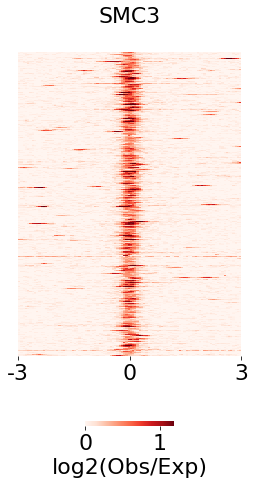

In [8]:
f, ax = plt.subplots(
    figsize=(4, 8),
    nrows=1, 
    ncols=1)

ax.set_title('SMC3\n', fontsize = 22)
im = sns.heatmap(stacks["SMC3"], 
                 ax=ax, 
                 cmap = 'Reds', 
                 vmin=0.0, 
                 vmax=1.2,
                 yticklabels=False,
                 cbar_kws={'orientation':'horizontal', 'shrink':0.4, 'label':'log2(Obs/Exp)'})
ax.set_xticks(np.linspace(0, nbins, num = 3))
ax.set_xticklabels((np.linspace(-window/1000, window/1000, num = 3, dtype = int)), rotation = 0)

plt.show();


In [9]:
resDir = "/groups/gerlich/experiments/Experiments_005700/005784/results/signal_peak_classification/stacks/"
f.savefig (os.path.join(resDir, f'stack_ups_SMC3_{name}_window_{window}.png'), bbox_inches="tight", transparent=True)


(-0.05, 0.8)

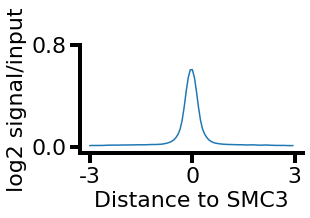

In [10]:
f, ax = plt.subplots(
 figsize=(4, 2),
 nrows=1, 
 ncols=1)
 
ax.plot(stacks["SMC3"].mean(axis=0))
ax.set_xticks(np.linspace(0, nbins, num = 3))
ax.set_xticklabels((np.linspace(-window/1000, window/1000, num = 3, dtype = int)), rotation = 0)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params('both', length=10, width=4, which='major')
plt.xlabel ('Distance to SMC3')
plt.ylabel ('log2 signal/input')
ax.set_yticks ([0.0, 0.8])
plt.ylim(-0.05,0.8)

In [11]:
f.savefig (os.path.join(resDir, f'mean_SMC3_{name}_window_{window}.png'), bbox_inches="tight", transparent=True)
f.savefig (os.path.join(resDir, f'mean_SMC3_{name}_window_{window}.pdf'), bbox_inches="tight", transparent=True)

## Plot stacks for Sororin 

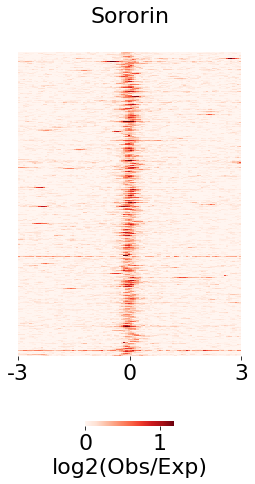

In [12]:
f, ax = plt.subplots(
    figsize=(4, 8),
    nrows=1, 
    ncols=1)

ax.set_title('Sororin\n', fontsize = 22)
im = sns.heatmap(stacks["Sororin"], 
                 ax=ax, 
                 cmap = 'Reds', 
                 vmin=0.0, 
                 vmax=1.2, 
                 yticklabels=False,
                 cbar_kws={'orientation':'horizontal', 'shrink':0.4, 'label':'log2(Obs/Exp)'})
ax.set_xticks(np.linspace(0, nbins, num = 3))
ax.set_xticklabels((np.linspace(-window/1000, window/1000, num = 3, dtype = int)), rotation = 0)

plt.show();


In [13]:
f.savefig (os.path.join(resDir, f'stack_ups_Sororin_{name}_window_{window}.png'), bbox_inches="tight", transparent=True)
#f.savefig (os.path.join(resDir, f'stack_ups_Sororin_{time}_{name}_at_{center}.pdf'), bbox_inches="tight", transparent=True)

(-0.05, 0.8)

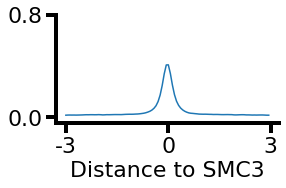

In [14]:
f, ax = plt.subplots(
 figsize=(4, 2),
 nrows=1, 
 ncols=1)
 
ax.plot(stacks["Sororin"].mean(axis=0))
ax.set_xticks(np.linspace(0, nbins, num = 3))
ax.set_xticklabels((np.linspace(-window/1000, window/1000, num = 3, dtype = int)), rotation = 0)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params('both', length=10, width=4, which='major')
plt.xlabel ('Distance to SMC3')
ax.set_yticks ([0.0, 0.8])
plt.ylim(-0.05,0.8)

In [15]:
f.savefig (os.path.join(resDir, f'mean_sororin_{name}_window_{window}.png'), bbox_inches="tight", transparent=True)
f.savefig (os.path.join(resDir, f'mean_sororin_{name}_window_{window}.pdf'), bbox_inches="tight", transparent=True)